In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [18]:
%cd /content/gdrive/My Drive/misc/kaggle/twitter_bot
!pwd

/content/gdrive/My Drive/misc/kaggle/twitter_bot
/content/gdrive/My Drive/misc/kaggle/twitter_bot


In [19]:
# !kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020


In [20]:
!ls
!cd gdrive
!ls

Company.csv  Company_Tweet.csv	Tweet.csv
/bin/bash: line 0: cd: gdrive: No such file or directory
Company.csv  Company_Tweet.csv	Tweet.csv


In [21]:
# !unzip \*.zip  && rm *.zip

In [22]:
import pandas as pd 

company = pd.read_csv('Company.csv')
comp_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')

In [23]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 19.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat


In [25]:
tweets = pd.merge(tweet,comp_tweet,on='tweet_id',how='inner')


In [26]:
# converting postdate from 
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets.dtypes

tweet_id                  int64
writer                   object
post_date        datetime64[ns]
body                     object
comment_num               int64
retweet_num               int64
like_num                  int64
ticker_symbol            object
dtype: object

In [27]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
tweet['datetime'] = pd.to_datetime(tweet['post_date'], unit='s')
tweet = tweet.drop(['post_date'], axis=1, inplace=False)

In [28]:
# tweets.dtypes
tweets.shape

(4336445, 9)

In [29]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [30]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   writer         object        
 2   post_date      datetime64[ns]
 3   body           object        
 4   comment_num    int64         
 5   retweet_num    int64         
 6   like_num       int64         
 7   ticker_symbol  object        
 8   date           datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 330.8+ MB


In [31]:
# tweets = tweets.drop(['tweet_id'],axis=1)

In [32]:
tweets.isna().sum()

tweet_id             0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [33]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [34]:
# assigns all tweets regarding a company to said variable

aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [35]:
tsla

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
5,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01
7,550443808606126081,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01
9,550443809700851716,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01
11,550443857142611968,Cprediction,2015-01-01 00:10:16,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01
...,...,...,...,...,...,...,...,...,...
4336432,1212158772015034369,StockJoke,2019-12-31 23:49:06,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,TSLA,2019-12-31
4336434,1212159099632267268,sweetog76,2019-12-31 23:50:24,$TSLA Very Interesting dude:,0,0,0,TSLA,2019-12-31
4336436,1212159184931717120,MelaynaLokosky,2019-12-31 23:50:45,If only 2020 brought more self-awareness to Te...,0,1,0,TSLA,2019-12-31
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31


In [36]:
tweets['ticker_symbol']

0          AAPL
1          AAPL
2          AMZN
3          TSLA
4          AAPL
           ... 
4336440    TSLA
4336441    TSLA
4336442    AAPL
4336443    MSFT
4336444    AAPL
Name: ticker_symbol, Length: 4336445, dtype: object

In [37]:
tweets = tweets.dropna()
tweet = tweet.dropna()
print(f"Number of writers: {tweets['writer'].nunique()}")

Number of writers: 140131


In [38]:
# duplicated tweets

print("Percent of duplicated tweets: {:.2f} %".format(sum(tweet['body'].duplicated())/len(tweet) * 100))

Percent of duplicated tweets: 10.35 %


In [39]:
# writer activity

stats = tweet[['writer', 'tweet_id']].groupby('writer').agg("count").rename(columns={'tweet_id' : 'tweet_count'})
stats

,tweet_count
writer,
0000derek,9
00012859dn,1
0001_Trader,18
000Cloxd000,1
000or00,1
...,...
zzmultimediaes,1
zzrawlins,1
zzumot,2


Text(0, 0.5, 'Tweet count')

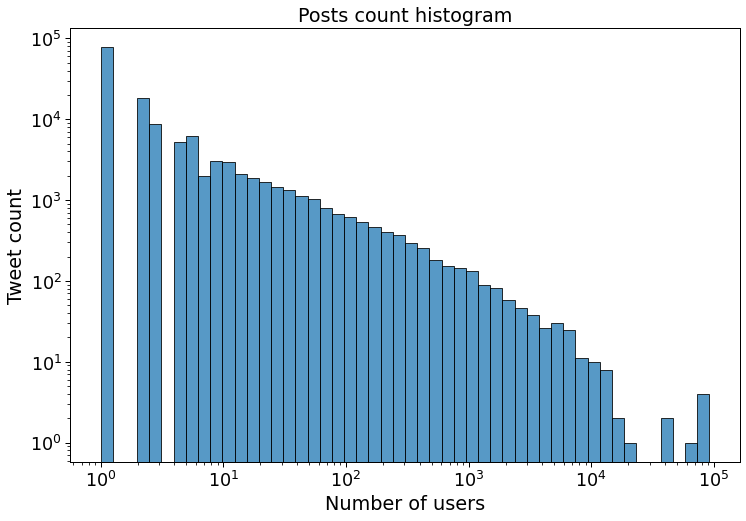

In [40]:
sns.set_context("paper", font_scale=2)

plt.figure(figsize=(12, 8))

sns.histplot(data=stats, x='tweet_count', bins=50, log_scale=True)
plt.yscale('log')
plt.title("Posts count histogram")
plt.xlabel("Number of users")
plt.ylabel("Tweet count")

Financial Analysis Begins

In [41]:
!pip install yfinance

In [42]:
import yfinance as yf

In [43]:
tsla_stock = yf.Ticker('TSLA')

start = min(tsla['date'])
end = max(tsla['date'])

In [44]:
#assigns all stock history to tsla_stock
tsla_stock = tsla_stock.history(start=start.date(), end=end.date())
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0
2015-01-08,42.562000,42.759998,42.001999,42.124001,17212500,0,0
...,...,...,...,...,...,...,...
2019-12-23,82.356003,84.402000,82.000000,83.844002,66598000,0,0
2019-12-24,83.671997,85.094002,82.538002,85.050003,40273500,0,0
2019-12-26,85.582001,86.695999,85.269997,86.188004,53169500,0,0


In [ ]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [ ]:
def tweet_vol_affect(tweets,stocks,title):

    # .shift(-1) shifts the date stock prices one day ahead, so i can compare tweets from 1st jan to stock prices from 2nd jan
    # .size() tells me the number of tweets per day for the stock; .dropna() removes all the NaN values
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    
    stock_data = stocks['Volume'].dropna()    # assigns the total traded volume on said day to stock_data

    # tweet_shift1.reindex(stock_data.index) -> changes the tweetshift database as per stock data (removes weekends, and all days trading was closed)
  
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')

    # finds the mean volume of tweets every 30 days
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    
    # finds the mean volume of trading volume every 30 days
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
  
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

In [ ]:
tweet_vol_affect(tsla,tsla_stock,"Tesla") 

In [ ]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

In [ ]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

In [ ]:
tweet_vol_affect(googl,googl_stock,"Google")

In [ ]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

In [ ]:
tweet_100 = tweet.loc[:100]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk
nltk.download('vader_lexicon')

Sentiment Analysis Begins


In [ ]:
# sentiment_nltk = SentimentIntensityAnalyzer()

# # Mild cleaning: remove weblinks, $ticker_symbol, # symbol from hashtags, remove excessive spaces
# tweet_100['prep_body'] = tweet_100['body'].replace(r"https?:\S+|http?:\S+|www?:\S+", '', regex=True).replace(r"[@#\$][a-zA-Z]+", '', regex=True).replace(r"\s\s+", ' ', regex=True).str.strip()

# tweet_100['positive_sentiment'] = tweet_100['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['pos'])
# tweet_100['negative_sentiment'] = tweet_100['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['neg'])
# tweet_100['total_sentiment'] = tweet_100['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['compound'])

sentiment_nltk = SentimentIntensityAnalyzer()

# Mild cleaning: remove weblinks, $ticker_symbol, # symbol from hashtags, remove excessive spaces
tweet['prep_body'] = tweet['body'].replace(r"https?:\S+|http?:\S+|www?:\S+", '', regex=True).replace(r"[@#\$][a-zA-Z]+", '', regex=True).replace(r"\s\s+", ' ', regex=True).str.strip()

tweet['positive_sentiment'] = tweet['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['pos'])
tweet['negative_sentiment'] = tweet['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['neg'])
tweet['total_sentiment'] = tweet['prep_body'].apply(lambda x: sentiment_nltk.polarity_scores(x)['compound'])

In [ ]:
print("Percent of cleaned duplicated tweets: {:.2f} %".format(sum(tweet['prep_body'].duplicated())/len(tweet) * 100))


In [ ]:
# stats = tweet[['date', 'positive_sentiment', 'negative_sentiment', 'total_sentiment']].groupby('date').mean()

# prices['date'] = prices['Date'].dt.date
# prices = prices.drop(['Date'], axis=1)
# stats = prices.join(stats, how='inner', on='date')